In [ ]:
# import sys
# !{sys.executable} -m pip install lifelines

In [ ]:
# import sys
# !{sys.executable} -m pip install ppscore

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#Exploratory Data Analysis
import pandas_profiling
from sklearn.preprocessing import LabelEncoder #For assigning unique integer value to a catogeries
from sklearn.preprocessing import OneHotEncoder #For creating columns for all 

#SMOTE Libraries
from imblearn.over_sampling import SMOTE

#ADASYN Libraries 
from imblearn.over_sampling import ADASYN

from lifelines.plotting import plot_lifetimes      # Lifeline package for the Survival Analysis
%pylab inline
figsize(12,6)

from warnings import filterwarnings
filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows',None)
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import matthews_corrcoef,f1_score
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve
from sklearn.model_selection import cross_val_score,KFold,cross_val_score,cross_validate
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.tree import plot_tree
from xgboost import plot_tree,plot_importance
from sklearn import tree
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from yellowbrick.classifier import ClassificationReport, confusion_matrix,precision_recall_curve,PrecisionRecallCurve,ConfusionMatrix,ROCAUC,DiscriminationThreshold
from yellowbrick.model_selection import FeatureImportances,learning_curve,LearningCurve
from yellowbrick.target import class_balance
import itertools
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.experimental import enable_hist_gradient_boosting  
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
from imblearn.over_sampling import SMOTE,BorderlineSMOTE,KMeansSMOTE

Populating the interactive namespace from numpy and matplotlib


In [3]:
#creating a function to read data
def readData(path_name):
    data=pd.read_csv(path_name)
    return data

In [4]:
path='/Users/arvindpawar/Desktop/Survival Analysis/WA_Fn-UseC_-Telco-Customer-Churn.csv'

In [5]:
telco_data = readData(path)

In [6]:
telco_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
telco_df_for_SA=telco_data.copy()

In [8]:
telco_df1 = telco_data.copy()

In [9]:
pandas_profiling.ProfileReport(telco_data)

In [10]:
def getInfo(data):
    return data.info()

In [11]:
getInfo(telco_data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [12]:
def changeDataType(data, column_name):
    data[column_name] = pd.to_numeric(data[column_name],errors='coerce')
    return data[column_name]
    #telco_df['TotalCharges']=pd.to_numeric(telco_df['TotalCharges'],errors='coerce')

In [13]:
changeDataType(telco_data, 'TotalCharges').head()

0      29.85
1    1889.50
2     108.15
3    1840.75
4     151.65
Name: TotalCharges, dtype: float64

In [14]:
getInfo(telco_data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [15]:
## Replace yes and No in the Churn column to 1 and 0. 1 for the event and 0 for the censured data.
telco_data['Churn']=telco_data['Churn'].apply(lambda x: 1 if x == 'Yes' else 0 )

In [16]:
## Create a list of Categorical Columns
cat_cols= [i  for i in telco_data.columns if telco_data[i].dtype==object]
cat_cols.remove('customerID')  ## customerID has been removed because it is unique for all the rows.

In [17]:

for i in cat_cols:
    print('Column Name: ',i)
    print(telco_data[i].value_counts())
    print('-----------------------------')

Column Name:  gender
Male      3555
Female    3488
Name: gender, dtype: int64
-----------------------------
Column Name:  Partner
No     3641
Yes    3402
Name: Partner, dtype: int64
-----------------------------
Column Name:  Dependents
No     4933
Yes    2110
Name: Dependents, dtype: int64
-----------------------------
Column Name:  PhoneService
Yes    6361
No      682
Name: PhoneService, dtype: int64
-----------------------------
Column Name:  MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
-----------------------------
Column Name:  InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
-----------------------------
Column Name:  OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
-----------------------------
Column Name:  OnlineBackup
No                     3088
Yes     

In [18]:
    # Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()

In [19]:
for i in cat_cols:
    #print('Column Name: ',i)
    telco_data[i] = label_encoder.fit_transform(telco_data[i])
    #print('-----------------------------') 

In [20]:
telco_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


<AxesSubplot:>

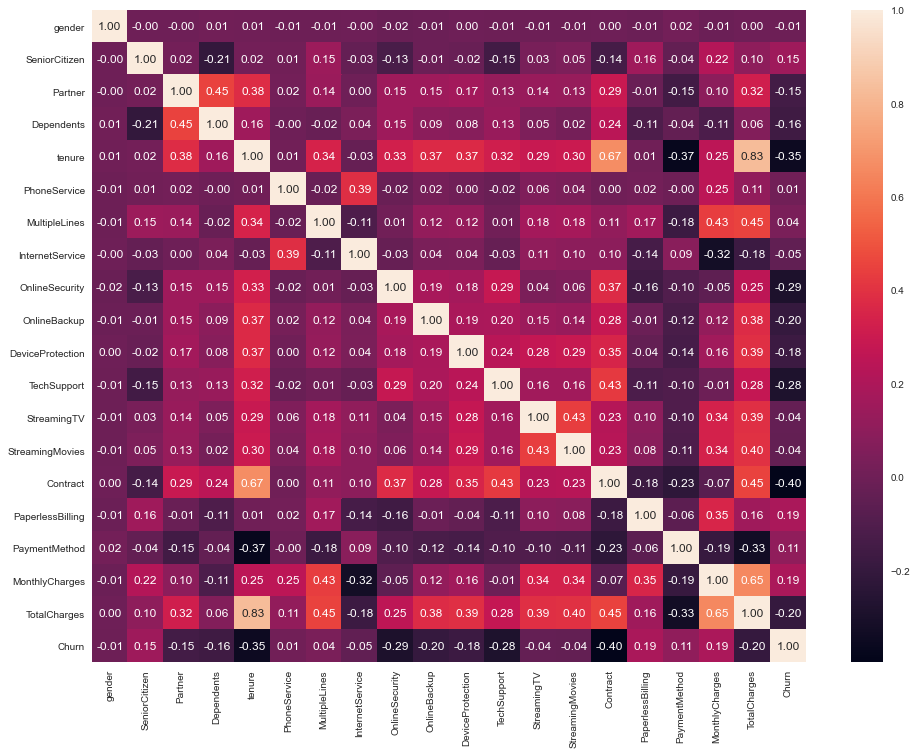

In [21]:
plt.figure(figsize=(16,12))
sns.heatmap(telco_data.corr(),annot=True,fmt=".2f")

In [22]:
cont_features = ["tenure", "MonthlyCharges", "TotalCharges"]
df_num = telco_data[cont_features]
churn = telco_data['Churn'] == 1

In [23]:
def plot_dist_num_cols_target(df, cont_features, target, target_label):
    fig, axs = plt.subplots(ncols=1, nrows=len(cont_features), figsize=(20, 20))
    plt.subplots_adjust(right=1.5)
    for i, feature in enumerate(cont_features):    
        sns.distplot(df[~target][feature], label='Not {}'.format(target_label), hist=True, color='#e74c3c', ax=axs[i])
        sns.distplot(df[target][feature], label='{}'.format(target_label), hist=True, color='#2ecc71', ax=axs[i])
        
        axs[i].set_xlabel('')
        axs[i].set_xlabel('')
        
        for j in range(len(cont_features)):        
            axs[j].tick_params(axis='x', labelsize=15)
            axs[j].tick_params(axis='y', labelsize=15)

        axs[i].legend(loc='upper right', prop={'size': 10})
        axs[i].legend(loc='upper right', prop={'size': 10})
        axs[i].set_title('Distribution of {} in {}'.format(target_label, feature), size=20, y=1.05)

    plt.tight_layout(pad=5)
    plt.savefig('numerical_attributes.png')
    plt.show()

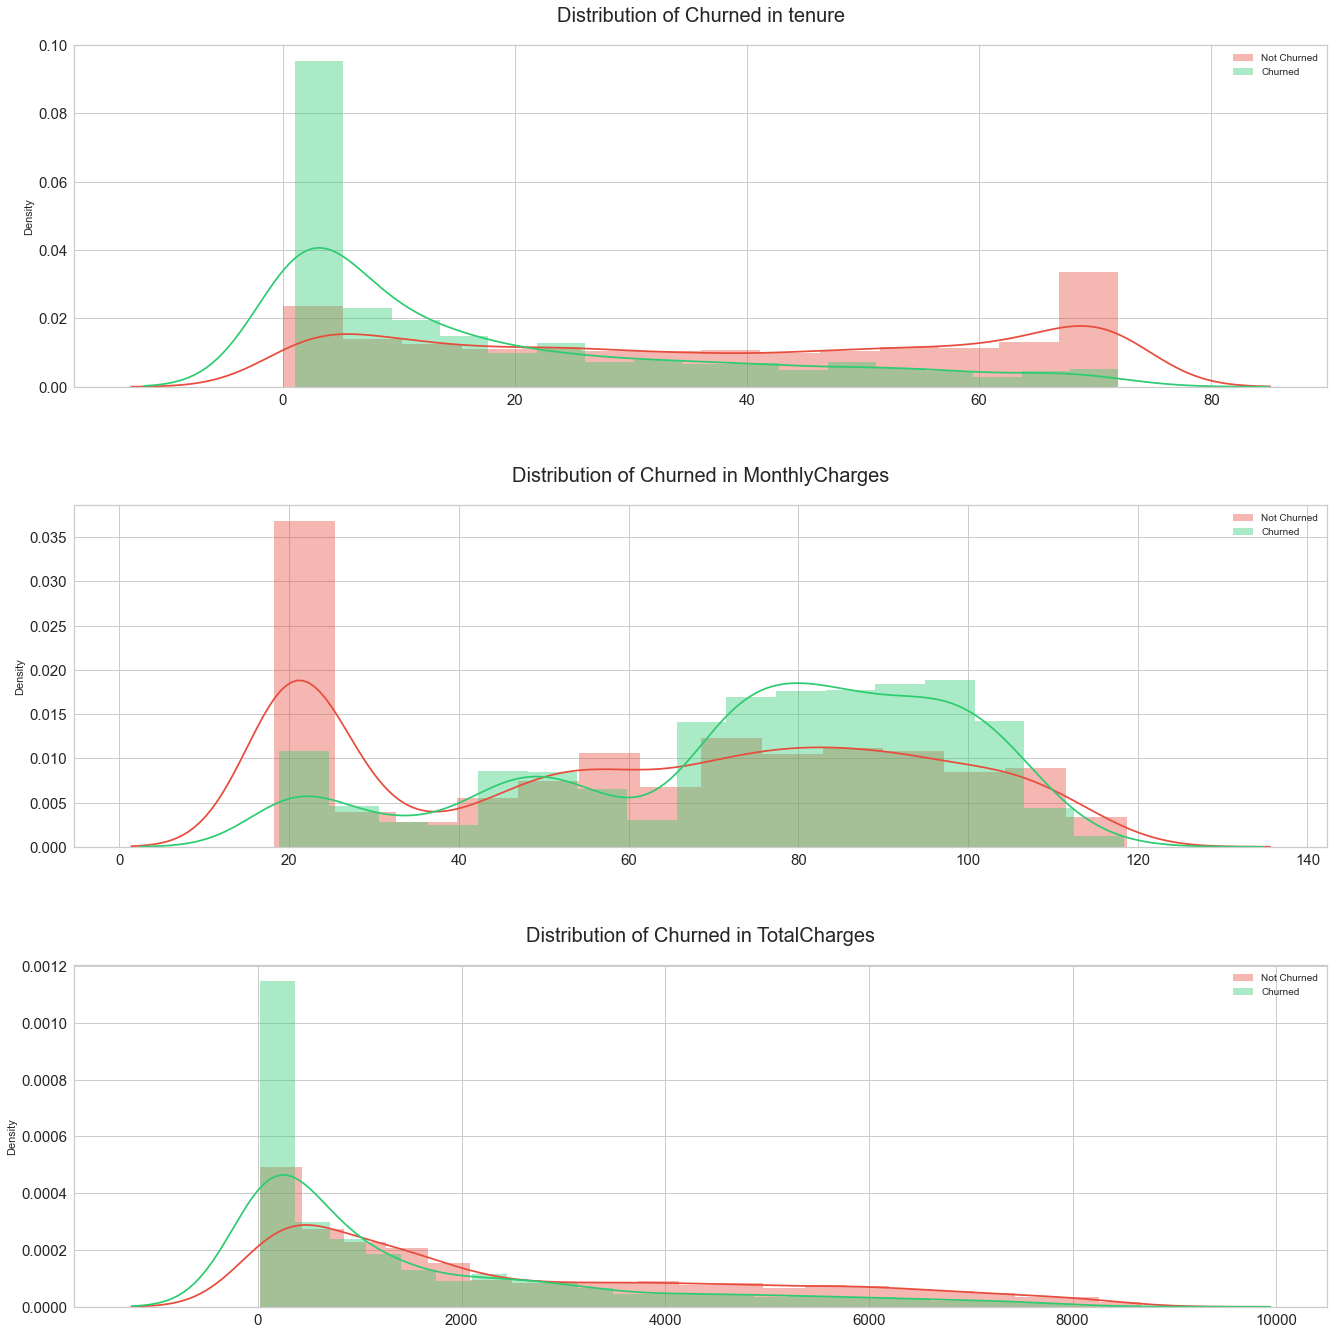

In [24]:
plot_dist_num_cols_target(telco_data, cont_features, churn, 'Churned')

In [25]:
telco_df1_dummy=pd.get_dummies(telco_df1,columns=['gender','Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
                                         'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 
                                         'PaperlessBilling', 'PaymentMethod'])

In [27]:
## Replace yes and No in the Churn column to 1 and 0. 1 for the event and 0 for the censured data.
telco_df1_dummy['Churn']=telco_df1_dummy['Churn'].apply(lambda x: 1 if x == 'Yes' else 0 )

In [28]:
telco_df1_dummy.head()

,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,1,29.85,29.85,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
1,5575-GNVDE,0,34,56.95,1889.5,0,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1
2,3668-QPYBK,0,2,53.85,108.15,1,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
3,7795-CFOCW,0,45,42.30,1840.75,0,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0
4,9237-HQITU,0,2,70.70,151.65,1,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0


In [35]:
changeDataType(telco_df1_dummy, 'TotalCharges').head()

0      29.85
1    1889.50
2     108.15
3    1840.75
4     151.65
Name: TotalCharges, dtype: float64

In [41]:
telco_df1_dummy['TotalCharges'].fillna(telco_df1_dummy['TotalCharges'].mean(), inplace=True)

In [42]:
# telco_df.head()

X=telco_df1_dummy.iloc[:, np.r_[1:5, 7:47]]
y=telco_df1_dummy.iloc[:, 5]

In [44]:
y.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [45]:
#Synthetic Minority Over Sampling Technique(SMOT)
sampler=SMOTE(random_state=0)
x_rs,y_rs=sampler.fit_sample(X,y)

In [46]:
y_rs.value_counts()

1    5174
0    5174
Name: Churn, dtype: int64

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [48]:
models = []
models.append(('LR', LogisticRegression(random_state = 12345)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier(random_state = 12345)))
models.append(('RF', RandomForestClassifier(random_state = 12345)))
models.append(("XGBoost", XGBClassifier(random_state = 12345)))
models.append(("GBM", GradientBoostingClassifier(random_state = 12345)))
models.append(("Gaussian", GaussianNB()))

In [49]:
results = []
names = []

In [50]:
#model tuning
for name, model in models:
    
        kfold = KFold(n_splits = 10, random_state = 12345)
        cv_results = cross_val_score(model, X, y, cv = 10, scoring= "accuracy")
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)

LR: 0.803778 (0.008819)
KNN: 0.761037 (0.012970)
CART: 0.722279 (0.008485)
RF: 0.790994 (0.018487)
XGBoost: 0.791421 (0.016109)
GBM: 0.806757 (0.015297)
Gaussian: 0.694731 (0.019413)


In [52]:
def visualize_result(model):
    print("*"*5 + str(model) + "*"*5)
    fig, axes = plt.subplots(2, 2,figsize=(20,10))

    model = model;
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    print("Accuracy Score :",accuracy_score(y_test,y_pred))
    print("Matthews_Corr :",matthews_corrcoef(y_test,y_pred))
    print("F1_Score :",f1_score(y_test,y_pred))
    
    visualgrid = [
        ConfusionMatrix(model, ax=axes[0][0],cmap="YlGn"),
        PrecisionRecallCurve(model,ax=axes[0][1]),  
        #FeatureImportances(model,ax=axes[0][0]),        
        ClassificationReport(model, ax=axes[1][0]),
        ROCAUC(model, ax=axes[1][1])
    ]

    for viz in visualgrid:
        
        viz.fit(X_train, y_train)
        viz.score(X_test, y_test)
        viz.finalize()


    plt.show()

*****LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=12345, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)*****
Accuracy Score : 0.8126064735945485
Matthews_Corr : 0.5069445789340418
F1_Score : 0.6283783783783784


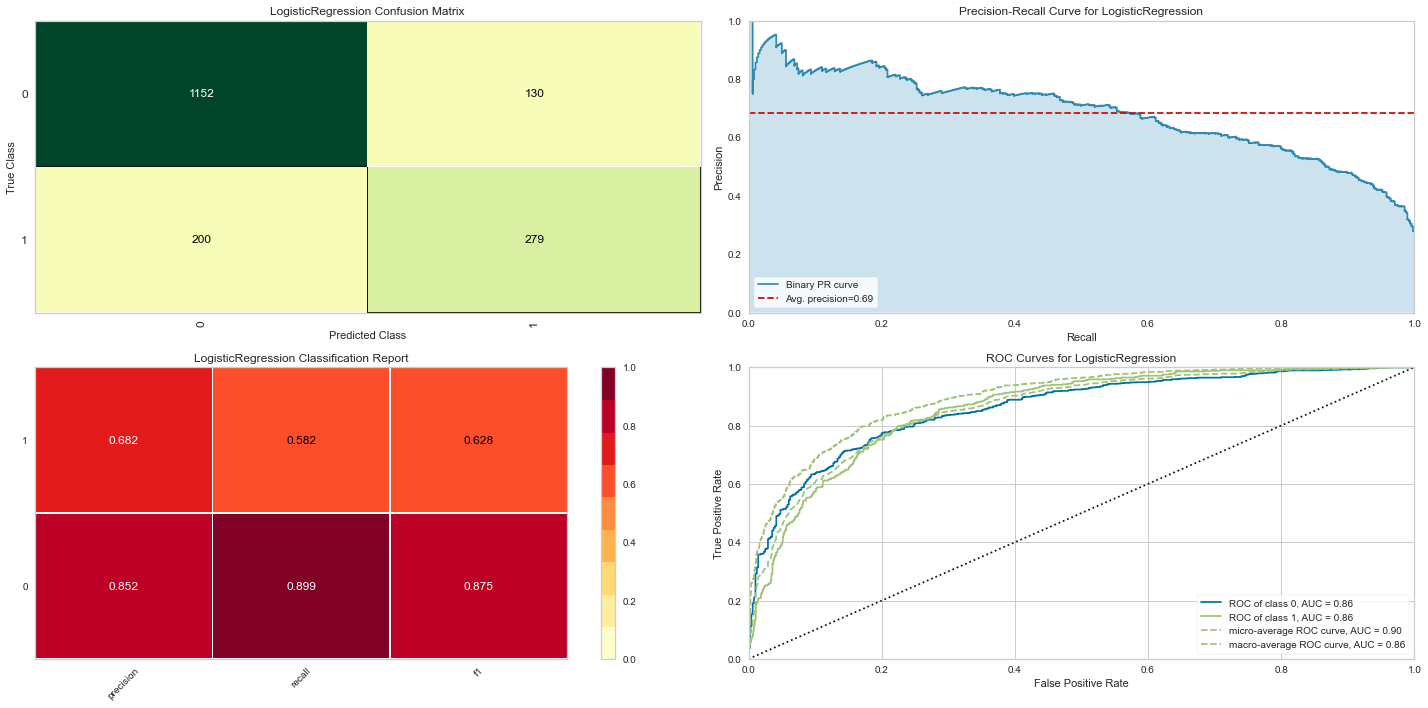

*****KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')*****
Accuracy Score : 0.7694491766042022
Matthews_Corr : 0.3789206667857635
F1_Score : 0.5223529411764706


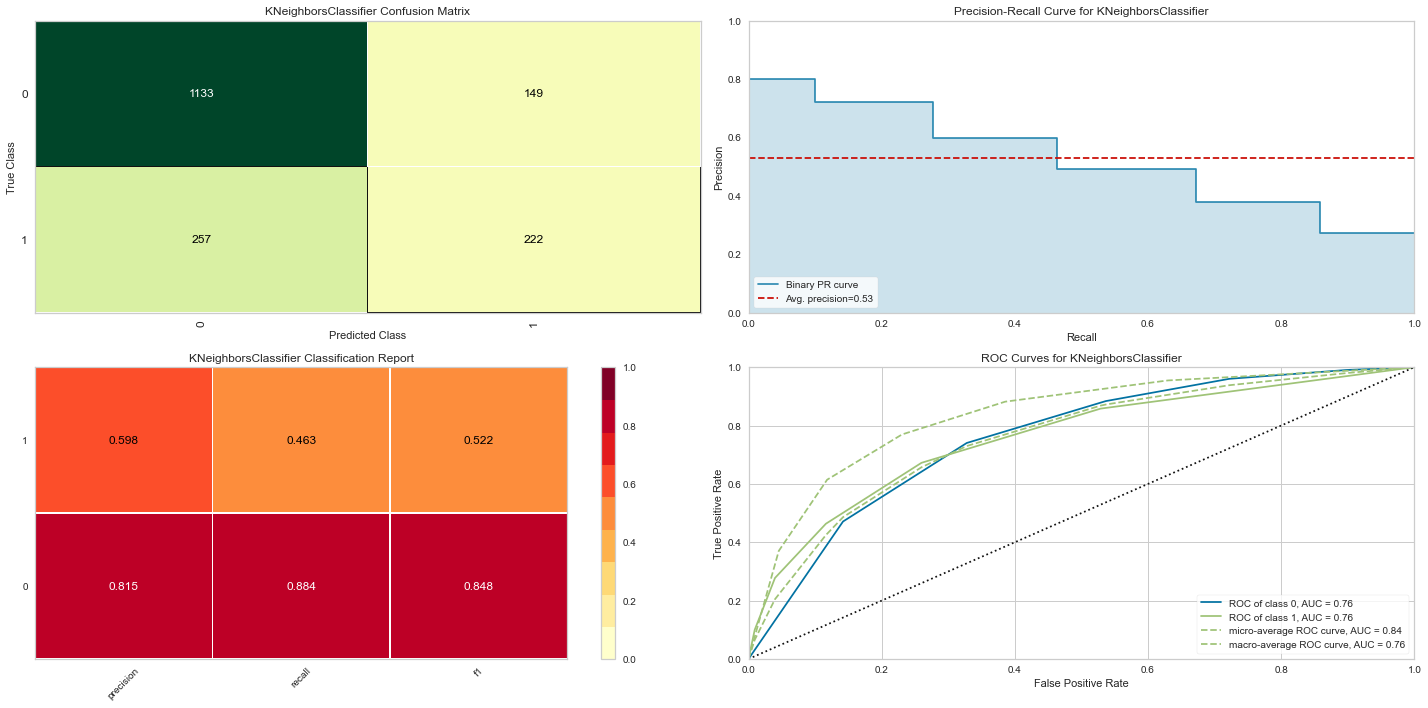

*****DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=12345, splitter='best')*****
Accuracy Score : 0.7365133446905168
Matthews_Corr : 0.3294786938044216
F1_Score : 0.5095137420718817


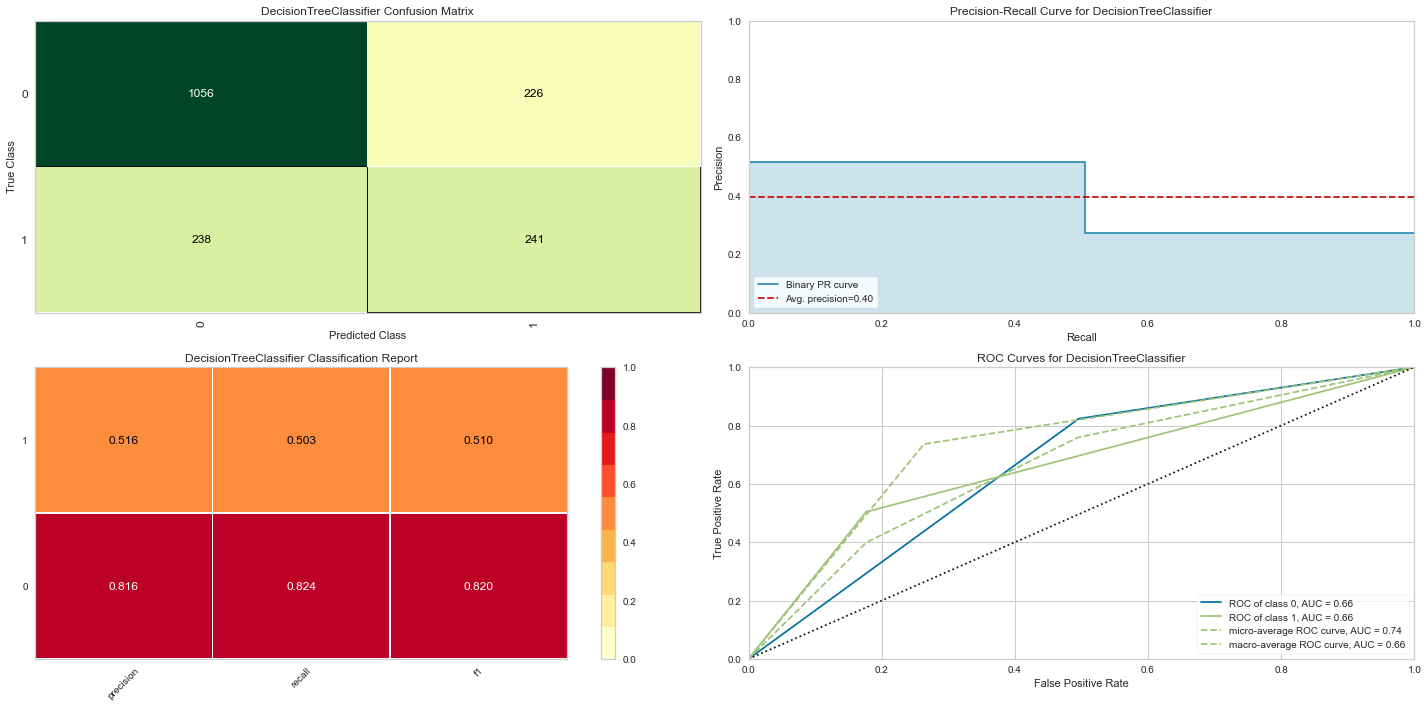

*****RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=12345,
                       verbose=0, warm_start=False)*****
Accuracy Score : 0.7876206700738216
Matthews_Corr : 0.42008842077652825
F1_Score : 0.5427872860635697


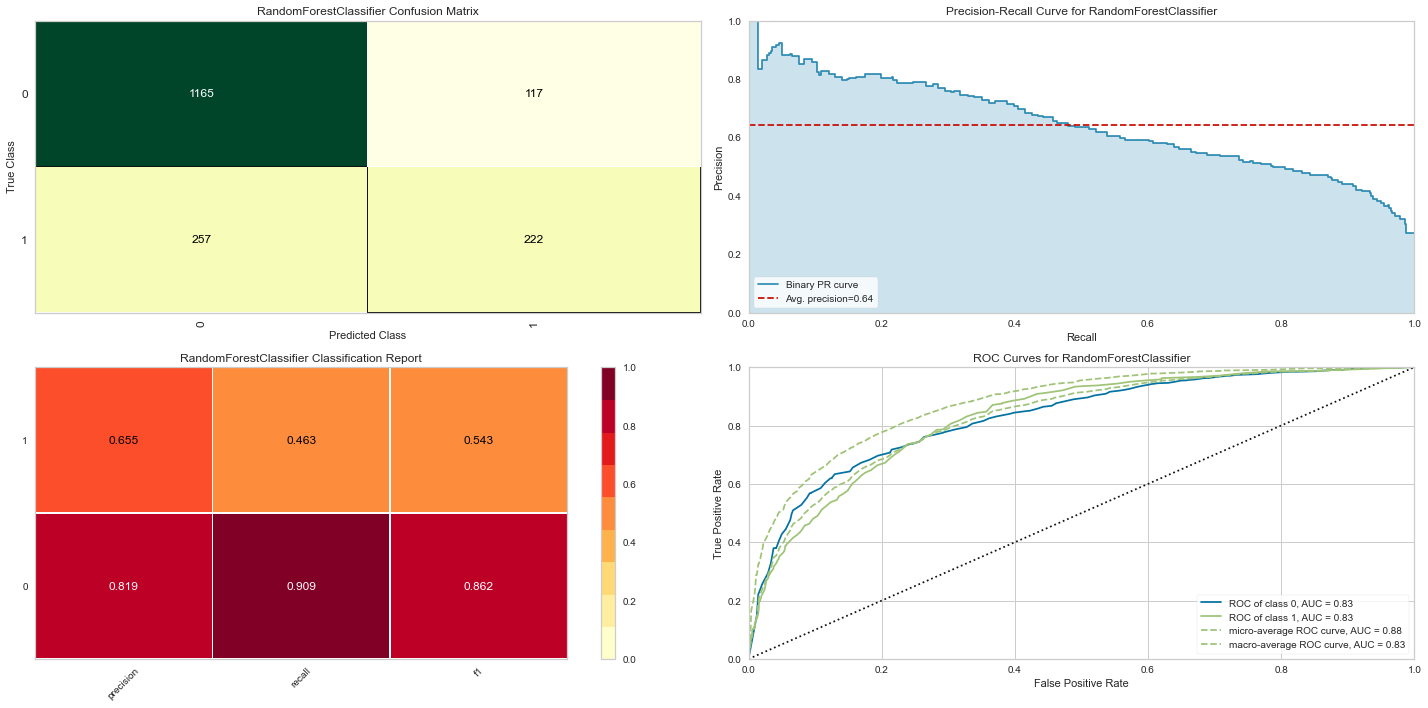

*****XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='binary:logistic', random_state=12345, reg_alpha=None,
              reg_lambda=None, scale_pos_weight=None, subsample=None,
              tree_method=None, validate_parameters=None, verbosity=None)*****
Accuracy Score : 0.7921635434412265
Matthews_Corr : 0.44262248467768783
F1_Score : 0.5714285714285714


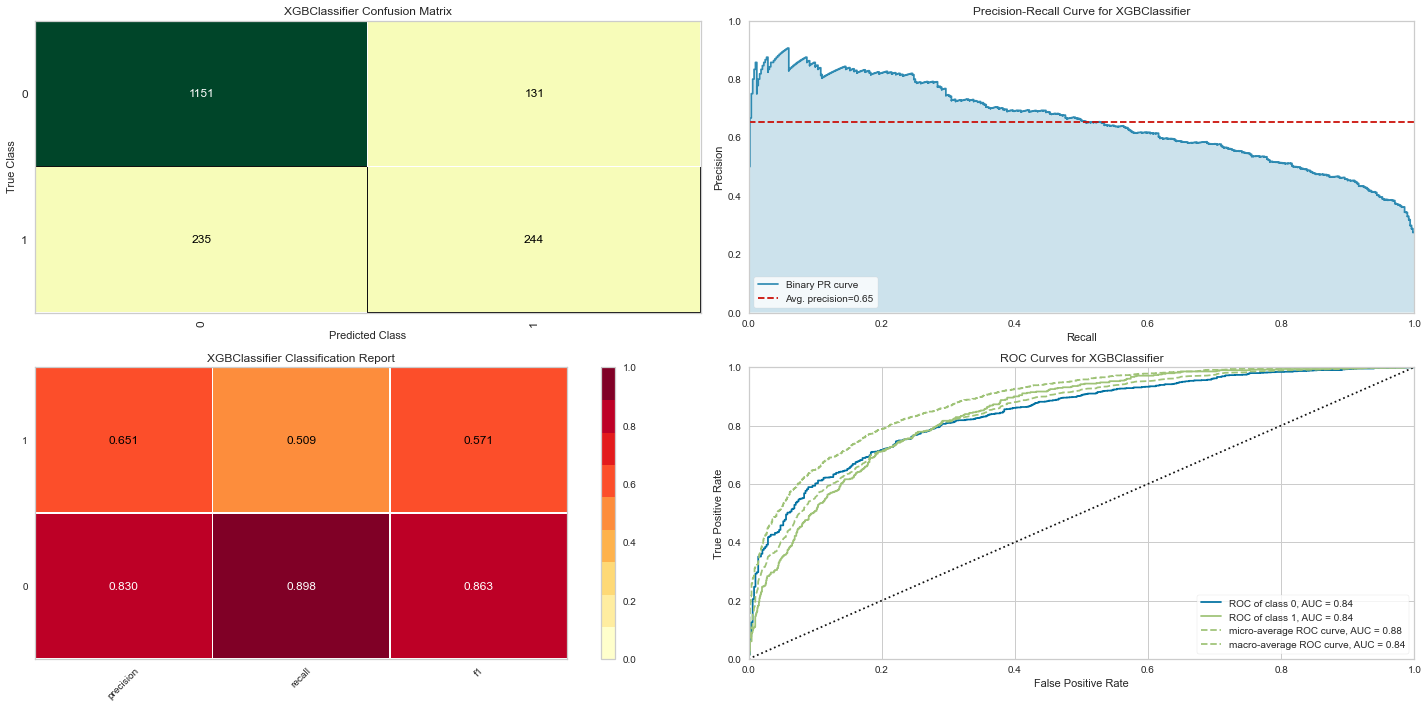

*****GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=12345, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)*****
Accuracy Score : 0.7961385576377058
Matthews_Corr : 0.4495781729346288
F1_Score : 0.5721096543504173


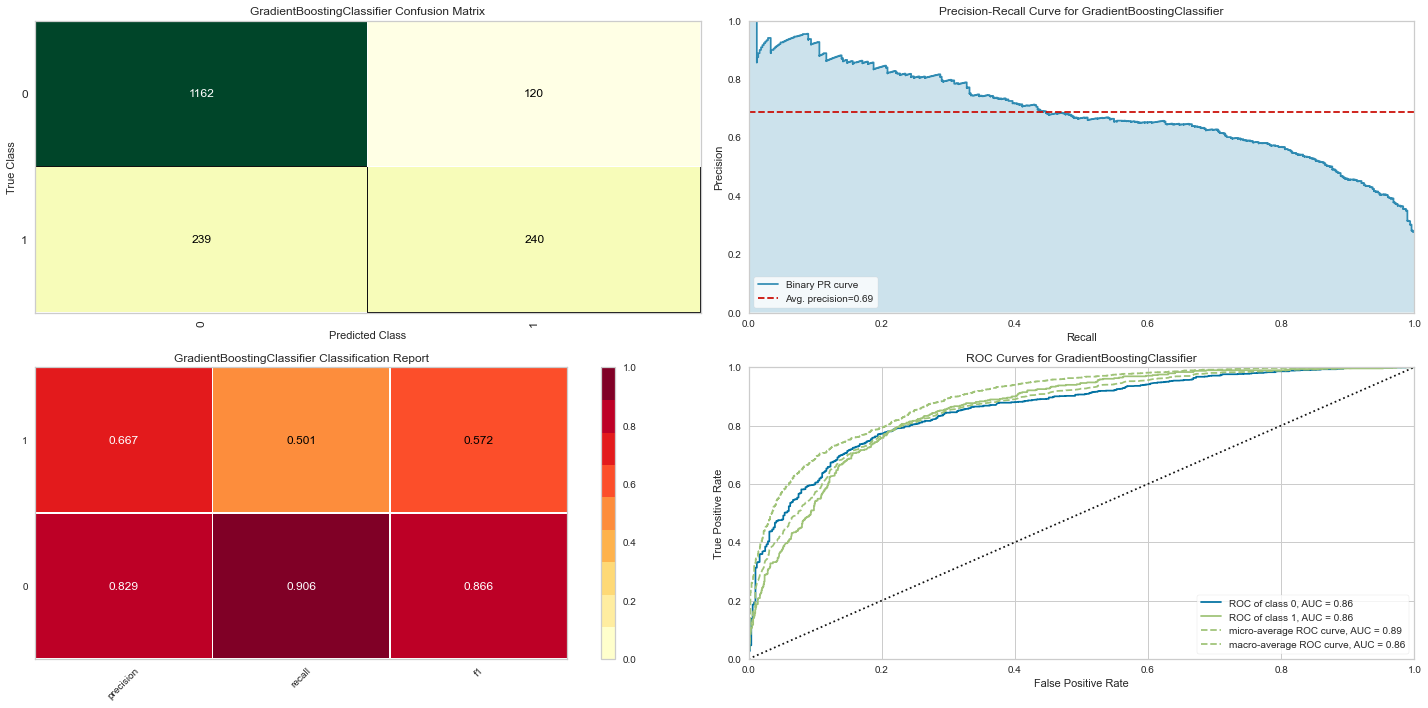

*****GaussianNB(priors=None, var_smoothing=1e-09)*****
Accuracy Score : 0.6996024985803521
Matthews_Corr : 0.4436273542546669
F1_Score : 0.608438193930422


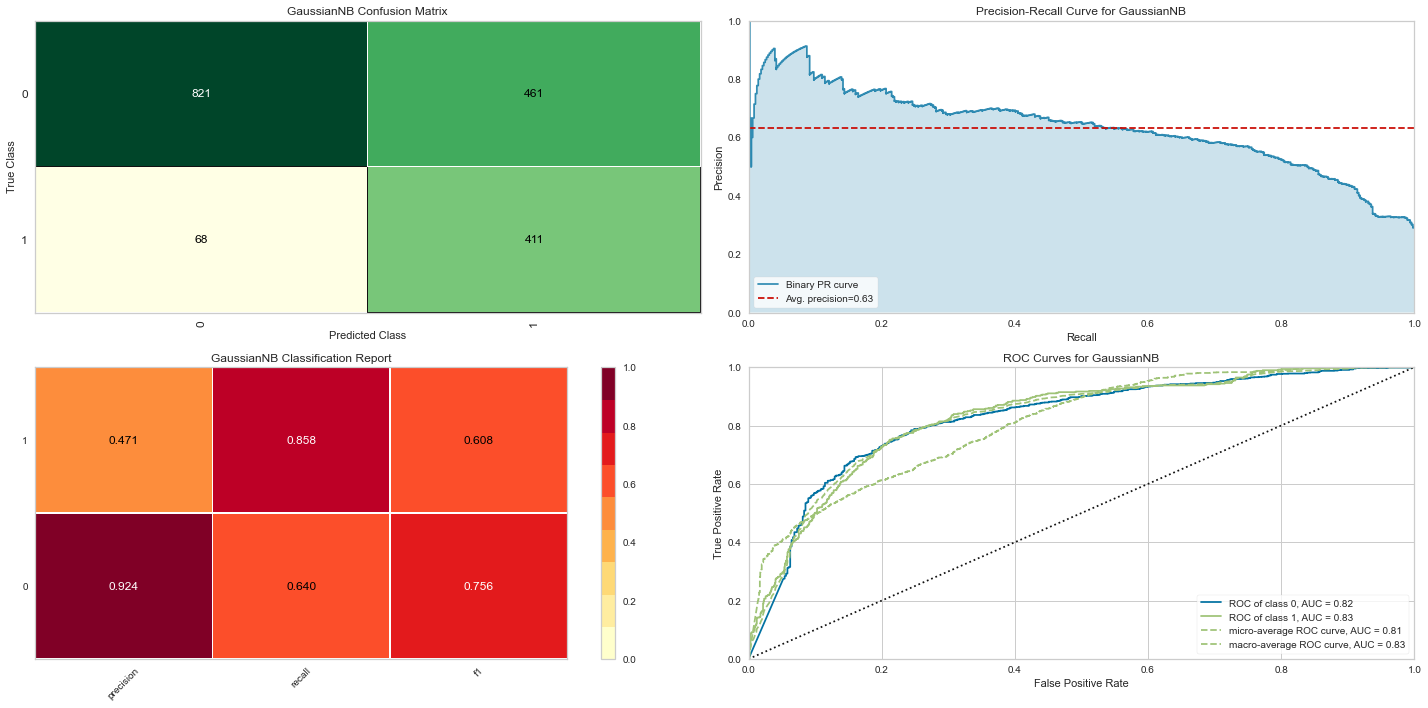

In [53]:
for i in range(len(models)):    
    visualize_result(models[i][1])

In [54]:

telco_df_for_SA['Churn']=telco_df_for_SA['Churn'].apply(lambda x: 1 if x == 'Yes' else 0 )

In [55]:
telco_df_for_SA.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0


<AxesSubplot:xlabel='timeline'>

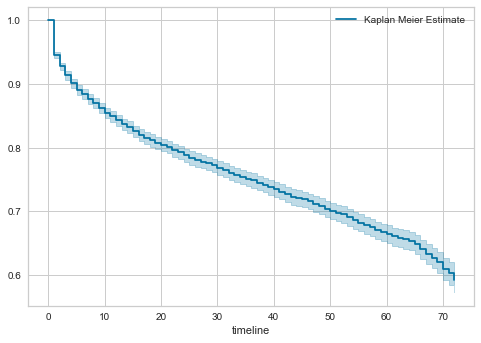

In [56]:
#Import the library
from lifelines import KaplanMeierFitter


durations = telco_df_for_SA['tenure'] ## Time to event data of censored and event data
event_observed = telco_df_for_SA['Churn']  ## It has the churned (1) and censored is (0)

#create a kmf object as km
km = KaplanMeierFitter() ## instantiate the class to create an object

#Fit the data into the model
km.fit(durations, event_observed,label='Kaplan Meier Estimate')

#Create an estimate
km.plot()

In [57]:
telco_df_for_SA.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0


<AxesSubplot:xlabel='timeline'>

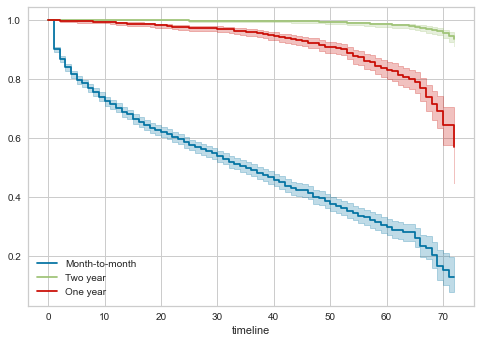

In [58]:
kmf = KaplanMeierFitter() 


T = telco_df_for_SA['tenure']     ## time to event
E = telco_df_for_SA['Churn']      ## event occurred or censored


groups = telco_df_for_SA['Contract']             ## Create the cohorts from the 'Contract' column
ix1 = (groups == 'Month-to-month')   ## Cohort 1
ix2 = (groups == 'Two year')         ## Cohort 2
ix3 = (groups == 'One year')         ## Cohort 3


kmf.fit(T[ix1], E[ix1], label='Month-to-month')    ## fit the cohort 1 data
ax = kmf.plot()


kmf.fit(T[ix2], E[ix2], label='Two year')         ## fit the cohort 2 data
ax1 = kmf.plot(ax=ax)


kmf.fit(T[ix3], E[ix3], label='One year')        ## fit the cohort 3 data
kmf.plot(ax=ax1)                                 ## Plot the KM curve for three cohort on same x and y axis

<AxesSubplot:xlabel='timeline'>

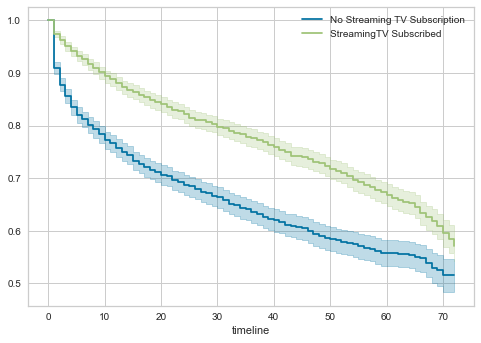

In [59]:
groups = telco_df_for_SA['StreamingTV']

a = (groups == 'No')
b = (groups == 'Yes')


kmf.fit(T[a], E[a], label='No Streaming TV Subscription')
a1=kmf.plot()

kmf.fit(T[b], E[b], label='StreamingTV Subscribed')
kmf.plot(ax=a1)

<AxesSubplot:xlabel='timeline'>

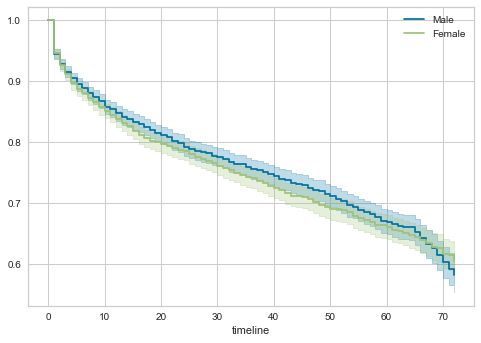

In [60]:

groups = telco_df_for_SA['gender']   
x = (groups == 'Male')      ## group i1 , having the pandas series for the 1st cohort
y = (groups == 'Female')     ## group i2 , having the pandas series for the 2nd cohort


## fit the model for 1st cohort
kmf.fit(T[x], E[x], label='Male')
a1 = kmf.plot()

## fit the model for 2nd cohort
kmf.fit(T[y], E[y], label='Female')
kmf.plot(ax=a1)

<AxesSubplot:xlabel='timeline'>

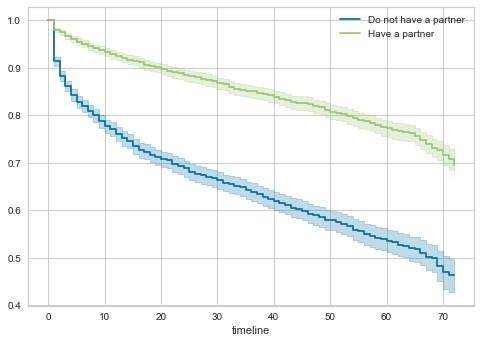

In [61]:
groups = telco_df_for_SA['Partner']   
m = (groups == 'No')      ## group i1 , having the pandas series for the 1st cohort
n = (groups == 'Yes')     ## group i2 , having the pandas series for the 2nd cohort


## fit the model for 1st cohort
kmf.fit(T[m], E[m], label='Do not have a partner')
a1 = kmf.plot()

## fit the model for 2nd cohort
kmf.fit(T[n], E[n], label='Have a partner')
kmf.plot(ax=a1)

In [62]:
from lifelines import CoxPHFitter

In [63]:
## My objective here is to introduce you to the implementation of the model.Thus taking subset of the columns to train the model.
## Only using the subset of the columns present in the original data
telco_df_r= telco_df_for_SA.loc[:,['tenure','Churn','gender','Partner','Dependents','PhoneService','MonthlyCharges','SeniorCitizen','StreamingTV']]
telco_df_r.head() ## have a look at the data

,tenure,Churn,gender,Partner,Dependents,PhoneService,MonthlyCharges,SeniorCitizen,StreamingTV
0,1,0,Female,Yes,No,No,29.85,0,No
1,34,0,Male,No,No,Yes,56.95,0,No
2,2,1,Male,No,No,Yes,53.85,0,No
3,45,0,Male,No,No,No,42.30,0,No
4,2,1,Female,No,No,Yes,70.70,0,No


In [64]:
telco_df_dummy = pd.get_dummies(telco_df_r, drop_first=True)
telco_df_dummy.head()

,tenure,Churn,MonthlyCharges,SeniorCitizen,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,StreamingTV_No internet service,StreamingTV_Yes
0,1,0,29.85,0,0,1,0,0,0,0
1,34,0,56.95,0,1,0,0,1,0,0
2,2,1,53.85,0,1,0,0,1,0,0
3,45,0,42.30,0,1,0,0,0,0,0
4,2,1,70.70,0,0,0,0,1,0,0


In [65]:
# Using Cox Proportional Hazards model
cph = CoxPHFitter()   ## Instantiate the class to create a cph object
cph.fit(telco_df_dummy, 'tenure', event_col='Churn')   ## Fit the data to train the model
cph.print_summary()    ## HAve a look at the significance of the features

<AxesSubplot:xlabel='log(HR) (95% CI)'>

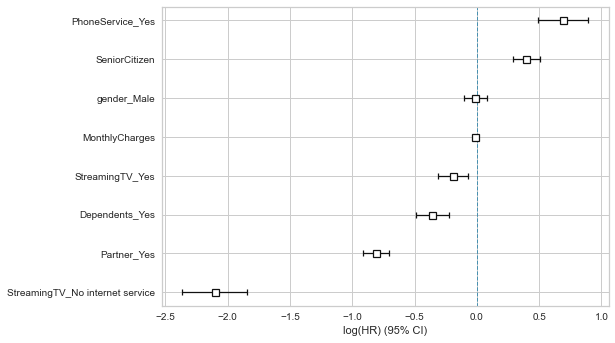

In [66]:
cph.plot()

In [67]:
telco_rows = telco_df_dummy.iloc[1:5, 2:]
telco_rows

,MonthlyCharges,SeniorCitizen,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,StreamingTV_No internet service,StreamingTV_Yes
1,56.95,0,1,0,0,1,0,0
2,53.85,0,1,0,0,1,0,0
3,42.30,0,1,0,0,0,0,0
4,70.70,0,0,0,0,1,0,0


Text(0, 0.5, 'Probability')

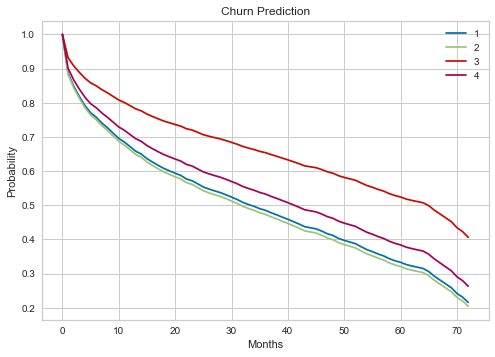

In [68]:
cph.predict_survival_function(telco_rows).plot()
plt.title("Churn Prediction")
plt.xlabel("Months")
plt.ylabel("Probability")